In [ ]:
from google.colab import drive
drive.mount('/content/drive')   #Mount Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# I am Working On Data of ASL (American Sign Language)
It consists of 26 letters and 10 digits

In [ ]:
!ls '/content/drive/My Drive/Datasets/'   #List what is in the path

 Digits				      sign_language_model.h5
'Sign Language'			      sign_language_model_New_256.h5
 signLanguageImagesLatest256.pickle   sign_language_model_New.h5
 signLanguageImagesLatest.pickle      Sports
 signLanguageLabelsLatest256.pickle   Sports_Celebrity_Data
 signLanguageLabelsLatest.pickle


In [ ]:
dataset_path = '/content/drive/My Drive/Datasets/Sign Language/'    #Set Path of Dataset

In [ ]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical   #Import relative libraries

In [ ]:
# lists to hold data

images = []
labels = []

In [ ]:
# Creating dictionaries to map folder names
name_mapping_dict = {'0': 0,'1': 1,'2': 2,'3': 3,'4': 4,'5': 5,'6': 6,'7': 7,'8': 8,'9': 9,'a': 10,'b': 11,'c': 12,
                     'd': 13,'e': 14,'f': 15,'g': 16,'h': 17,'i': 18,'j': 19,'k': 20,'l': 21,'m': 22,'n': 23,'o': 24,
                     'p': 25,'q': 26,'r': 27,'s': 28,'t': 29,'u': 30,'v': 31,'w': 32,'x': 33,'y': 34,'z': 35}

inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(name_mapping_dict)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'q': 26, 'r': 27, 's': 28, 't': 29, 'u': 30, 'v': 31, 'w': 32, 'x': 33, 'y': 34, 'z': 35}


In [ ]:
# listing all folder names in the specified path
folders = os.listdir(dataset_path)
folders

['x',
 'w',
 'q',
 'y',
 's',
 'v',
 'u',
 't',
 'r',
 'z',
 'k',
 'g',
 'm',
 'p',
 'o',
 'n',
 'l',
 'j',
 'i',
 'h',
 'b',
 '9',
 '6',
 '7',
 'a',
 '8',
 'e',
 'c',
 'f',
 'd',
 '1',
 '4',
 '2',
 '0',
 '5',
 '3']

In [ ]:
img_size = 256

In [ ]:
# looping through each folder and getting images and creating labels
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_path+folder+'/')
  for fname in filenames:
    img = plt.imread(dataset_path+folder+'/'+fname)
    img = cv2.resize(img, (img_size, img_size))
    images.append(img)
    labelId = name_mapping_dict[str(folder)]
    labels.append(labelId)

Processing folder: x
Processing folder: w
Processing folder: q
Processing folder: y
Processing folder: s
Processing folder: v
Processing folder: u
Processing folder: t
Processing folder: r
Processing folder: z
Processing folder: k
Processing folder: g
Processing folder: m
Processing folder: p
Processing folder: o
Processing folder: n
Processing folder: l
Processing folder: j
Processing folder: i
Processing folder: h
Processing folder: b
Processing folder: 9
Processing folder: 6
Processing folder: 7
Processing folder: a
Processing folder: 8
Processing folder: e
Processing folder: c
Processing folder: f
Processing folder: d
Processing folder: 1
Processing folder: 4
Processing folder: 2
Processing folder: 0
Processing folder: 5
Processing folder: 3


In [ ]:
# Converting lists to numpy arrays for easy matrix operations
images = np.array(images)
labels = np.array(labels)

In [ ]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (2515, 256, 256, 3)
labels shape :  (2515,)


In [2]:
#This is to store Images and Labels in drive
def save_object(images,labels):
    try:
      with open('/content/drive/My Drive/Datasets/signLanguageImagesLatest256.pickle', "wb") as f:
            pickle.dump(images, f, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as ex:
      print("Error during pickling object (Possibly unsupported):", ex)

    try:
      with open('/content/drive/My Drive/Datasets/signLanguageLabelsLatest256.pickle', "wb") as f:
            pickle.dump(labels, f, protocol=pickle.HIGHEST_PROTOCOL)
    except Exception as ex:
      print("Error during pickling object (Possibly unsupported):", ex)

def load_object(filename):
    try:
        with open(filename, "rb") as f:
            return pickle.load(f)
    except Exception as ex:
        print("Error during unpickling object (Possibly unsupported):", ex)

In [ ]:
#images = load_object('/content/drive/My Drive/Datasets/signLanguageImagesLatest256.pickle')
#labels = load_object('/content/drive/My Drive/Datasets/signLanguageLabelsLatest256.pickle')

In [ ]:
save_object(images,labels)

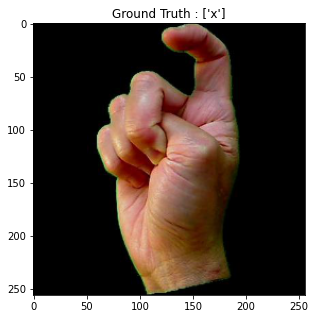

In [ ]:
# Plotting samples from data to check if data has been read successfully
img_number = 30
plt.figure(figsize=[10,5])
plt.imshow(images[img_number,:,:])
plt.title("Ground Truth : {}".format([inv_name_mapping_dict[labels[img_number]]]))
plt.show()

In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  36
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


In [ ]:
# Normalize training image pixels
images = np.array(images) / 255

In [ ]:
# Change the labels from integer to categorical data
labels_one_hot = to_categorical(labels)

In [ ]:
labels[303] #Verifiying Labels against one hot coding

28

In [ ]:
labels_one_hot[303]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

In [ ]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size = 0.20, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (2012, 256, 256, 3) (2012, 36)
Testing data shape :  (503, 256, 256, 3) (503, 36)


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten 

# Same padding: This padding ensures that the output layer has the same size as the input layer
model = Sequential()    #Sequential Model
model.add(Conv2D(32, 3, padding="same", activation="relu", input_shape=(img_size, img_size, 3)))    #First Layer Added, Relu is the inner activation function
model.add(MaxPool2D())    

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(classes_num, activation="softmax"))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])    #Compiling Model

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=15, verbose=1, 
                   validation_data=(test_images, test_labels))    #Training Model

Epoch 1/15
63/63 [==============================] - 170s 3s/step - loss: 1.3173 - accuracy: 0.6546 - val_loss: 0.3931 - val_accuracy: 0.8767
Epoch 2/15
63/63 [==============================] - 173s 3s/step - loss: 0.2042 - accuracy: 0.9329 - val_loss: 0.2845 - val_accuracy: 0.9125
Epoch 3/15
63/63 [==============================] - 177s 3s/step - loss: 0.0749 - accuracy: 0.9801 - val_loss: 0.2499 - val_accuracy: 0.9304
Epoch 4/15
63/63 [==============================] - 175s 3s/step - loss: 0.0438 - accuracy: 0.9876 - val_loss: 0.1689 - val_accuracy: 0.9543
Epoch 5/15
63/63 [==============================] - 176s 3s/step - loss: 0.0128 - accuracy: 0.9970 - val_loss: 0.1762 - val_accuracy: 0.9563
Epoch 6/15
63/63 [==============================] - 175s 3s/step - loss: 0.0263 - accuracy: 0.9930 - val_loss: 0.1972 - val_accuracy: 0.9563
Epoch 7/15
63/63 [==============================] - 177s 3s/step - loss: 0.0095 - accuracy: 0.9965 - val_loss: 0.1594 - val_accuracy: 0.9642
Epoch 8/15
63

In [ ]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc*100))    #Testing Accuracy

16/16 [==============================] - 11s 661ms/step - loss: 0.1940 - accuracy: 0.9662
Evaluation result on Test Data : Loss = 0.19403988122940063, accuracy = 96.62027955055237


In [1]:
print("Train Accuracy is 100%")
print("Test Accuracy is 96%")

Train Accuracy is 100%
Test Accuracy is 96%


In [ ]:
model_path = '/content/drive/My Drive/Datasets/Sign Language/'

model.save(model_path+'sign_language_model_New_256.h5')   #Storing DataModel

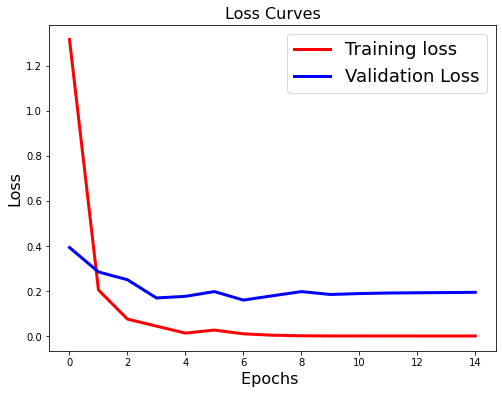

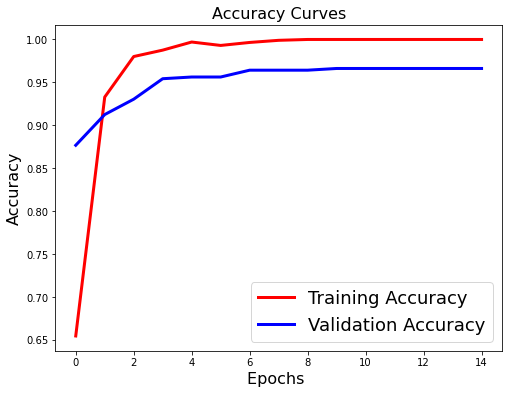

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

Model prediction: o


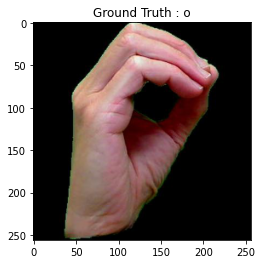

In [ ]:
# Predict the most likely class
test_img_number = 17

testImg = test_images[[test_img_number],:]
modelPrediction = model.predict(testImg)
modelPredictionMax = np.argmax(modelPrediction)
prediction = inv_name_mapping_dict[modelPredictionMax]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: n


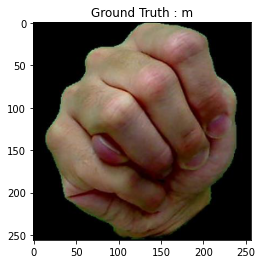

In [ ]:
# Predict the most likely class
test_img_number = 333

testImg = test_images[[test_img_number],:]
modelPrediction = model.predict(testImg)
modelPredictionMax = np.argmax(modelPrediction)
prediction = inv_name_mapping_dict[modelPredictionMax]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: d


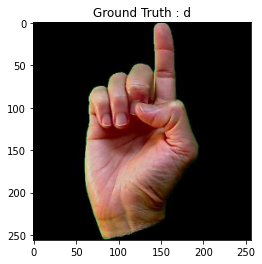

In [ ]:
# Predict the most likely class
test_img_number = 156

testImg = test_images[[test_img_number],:]
modelPrediction = model.predict(testImg)
modelPredictionMax = np.argmax(modelPrediction)
prediction = inv_name_mapping_dict[modelPredictionMax]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: n


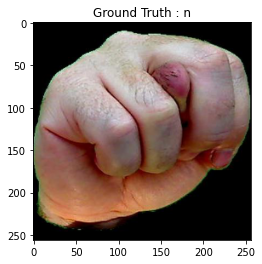

In [ ]:
# Predict the most likely class
test_img_number = 111

testImg = test_images[[test_img_number],:]
modelPrediction = model.predict(testImg)
modelPredictionMax = np.argmax(modelPrediction)
prediction = inv_name_mapping_dict[modelPredictionMax]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()

Model prediction: 6


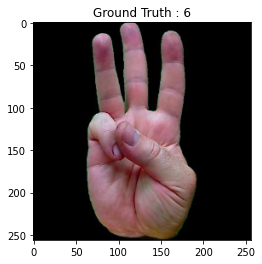

In [ ]:
# Predict the most likely class
test_img_number = 131

testImg = test_images[[test_img_number],:]
modelPrediction = model.predict(testImg)
modelPredictionMax = np.argmax(modelPrediction)
prediction = inv_name_mapping_dict[modelPredictionMax]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(test_images[test_img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
plt.show()